In [1]:
import pandas as pd
import numpy as np
import pylab as plt

In [2]:
data = pd.read_csv('resps.csv')

In [3]:
data

,Timestamp,What type of ticket did you purchase,Did you purchase this ticket from the organizers or secondhand?,How much did you purchase the ticket for? (priced per person),How many days prior to the event did you purchase the ticket?,Notes
0,4/12/2019 19:30:24,Latin BBQ,organizers,35,13.0,NaN
1,4/12/2019 19:31:32,Magic Gardens,secondhand,120,3.0,NaN
2,4/12/2019 19:34:19,Pool party,secondhand,115,5.0,NaN
3,4/12/2019 19:35:28,Latin BBQ,organizers,25,17.0,NaN
4,4/12/2019 19:35:58,Latin BBQ,organizers,33,15.0,NaN
5,4/12/2019 19:39:22,Battleship Brunch,secondhand,1000,0.0,spam
6,4/12/2019 19:40:02,Latin BBQ,secondhand,420,0.0,spam
7,4/12/2019 19:40:14,Magic Gardens,secondhand,69,0.0,spam
8,4/12/2019 19:40:48,Ur Mom,organizers,10000000000,-10.0,spam
9,4/12/2019 19:55:52,Magic Gardens,organizers,50,22.0,NaN


In [4]:
data = data[data['Notes'].isnull()]


In [5]:
data.columns = ['ts', 'event', 'type',  'price', 'days', 'notes']

In [6]:
data['price'] = data['price'].astype('float')
data['days'] = data['days'].astype(float)
data = data[data['price'] < 1000]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
data['event'] = data['event'].str.lower()
data['days'] = -data['days']
data


,ts,event,type,price,days,notes
0,4/12/2019 19:30:24,latin bbq,organizers,35.00,-13.0,NaN
1,4/12/2019 19:31:32,magic gardens,secondhand,120.00,-3.0,NaN
2,4/12/2019 19:34:19,pool party,secondhand,115.00,-5.0,NaN
3,4/12/2019 19:35:28,latin bbq,organizers,25.00,-17.0,NaN
4,4/12/2019 19:35:58,latin bbq,organizers,33.00,-15.0,NaN
9,4/12/2019 19:55:52,magic gardens,organizers,50.00,-22.0,NaN
11,4/12/2019 20:01:27,magic gardens,organizers,55.00,-7.0,NaN
12,4/12/2019 20:01:44,413 productions,organizers,250.00,-7.0,NaN
13,4/12/2019 20:02:12,latin bbq,secondhand,75.00,-3.0,NaN
14,4/12/2019 20:02:23,latin bbq,secondhand,80.00,-2.0,NaN


In [8]:
data_aggs = data.groupby(['event', 'days']).aggregate({ 'price': 'mean', 'notes': 'size' }).reset_index()

In [9]:
data_aggs.sort_values(['event', 'days'])

,event,days,price,notes
0,413 productions,-7.0,287.500000,4
1,413 productions,-6.0,249.000000,1
2,413 productions,-5.0,250.000000,2
3,413 productions,-4.0,280.000000,1
4,413 productions,-3.0,400.000000,1
5,413 productions,-2.0,383.333333,3
6,413 productions,-1.0,403.333333,3
7,battleship brunch,-12.0,194.000000,1
8,battleship brunch,-7.0,120.500000,2
9,battleship brunch,-6.0,155.500000,6


In [10]:
data_aggs.columns = ['event','days','price','num_tickets']

In [11]:
data_aggs = data_aggs.sort_values('days', ascending=False)

In [12]:
events = data_aggs.groupby('event').size().reset_index()['event'].values

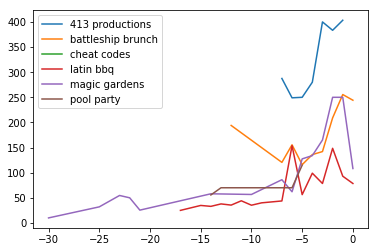

In [13]:
for i in events:
    y = data_aggs[data_aggs['event'] == i]['price'].values
    x = data_aggs[data_aggs['event'] == i]['days'].values
    plt.plot(x, y, label=i)
plt.legend()

In [14]:
data['min'] = data['price']
data['max'] = data['price']

data_aggs = data.groupby(['event', 'days']).aggregate({ 'price': 'mean', 'notes': 'size', 'min': 'min', 'max': 'max' }).reset_index()
data_aggs.columns = ['event', 'days', 'mean price', 'count', 'min', 'max']


In [15]:
mg_data = data_aggs[(data_aggs['event'] == 'magic gardens') & (data_aggs['days'] > -10)]
mg_data

,event,days,mean price,count,min,max
40,magic gardens,-7.0,86.000000,6,55.0,160.0
41,magic gardens,-6.0,62.000000,2,57.0,67.0
42,magic gardens,-5.0,127.500000,2,125.0,130.0
43,magic gardens,-4.0,134.000000,1,134.0,134.0
44,magic gardens,-3.0,165.000000,4,120.0,250.0
45,magic gardens,-2.0,250.000000,1,250.0,250.0
46,magic gardens,-1.0,250.000000,2,195.0,305.0
47,magic gardens,-0.0,108.272727,11,60.0,220.0


In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 12.5, 8.3


rcParams['font.size'] = 12

def make_plot(event_name):
    mg_data = data_aggs[(data_aggs['event'] == event_name) & (data_aggs['days'] > -10)]
    mg_data_pts = data[(data['event'] == event_name) & (data['days'] > -10)]
    fig, ax = plt.subplots(1,1)
    ax.set_facecolor('#FFFFFF')
    c = 'orange '
    ax.grid(color='k', linestyle='--', linewidth=0.5)
    ax.plot(mg_data['days'], mg_data['mean price'], "k--")
    ax.plot(mg_data_pts['days'], mg_data_pts['price'], "kD")
    ax.fill_between(mg_data['days'], mg_data['mean price'], mg_data['min'], facecolor="orange", alpha=0.55)
    ax.fill_between(mg_data['days'], mg_data['mean price'], mg_data['max'], facecolor="orange", alpha=0.55)
    ax.set_title('Ticket Sales for {}'.format(event_name))
    ax.set_xlabel('Days prior to event')
    ax.set_ylabel('Cost of ticket ($)')
    fig.savefig('{}.png'.format(event_name), dpi=300)
    

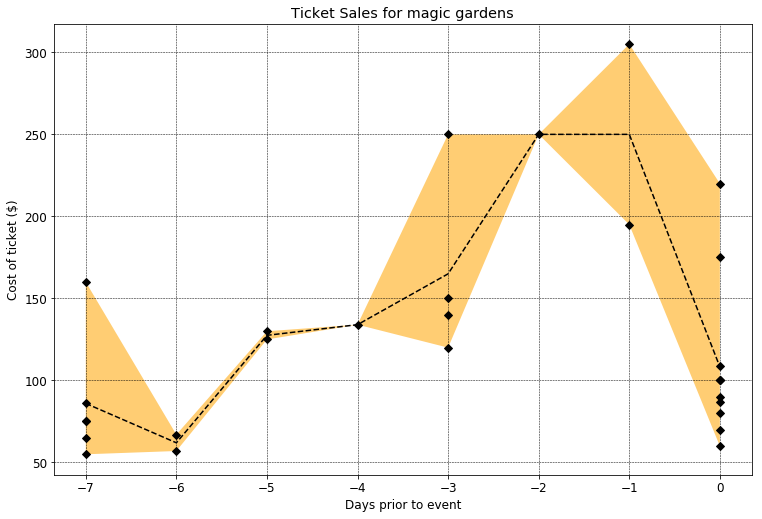

In [17]:
make_plot('magic gardens')

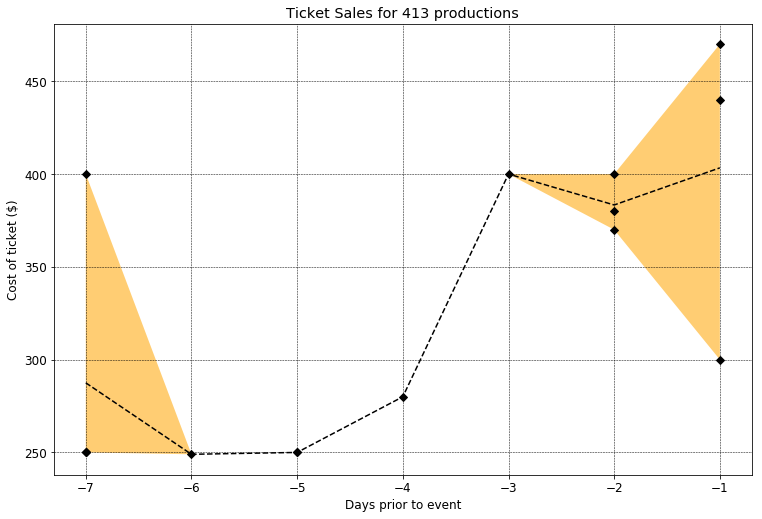

In [18]:
make_plot('413 productions')

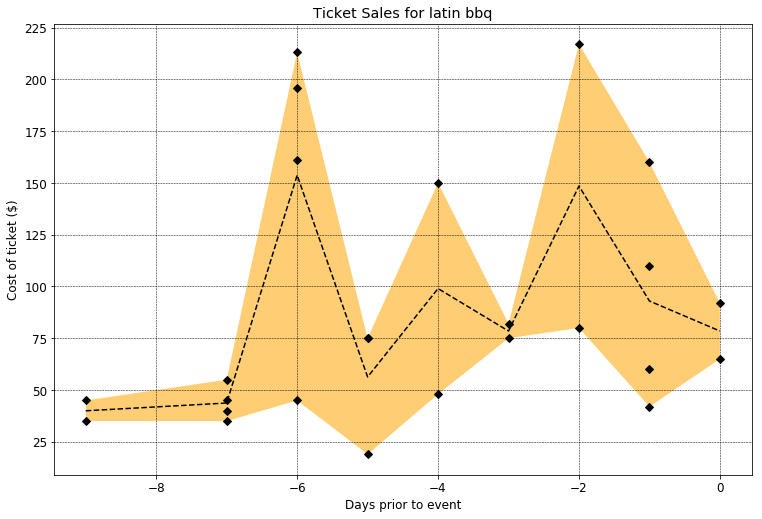

In [19]:
make_plot('latin bbq')

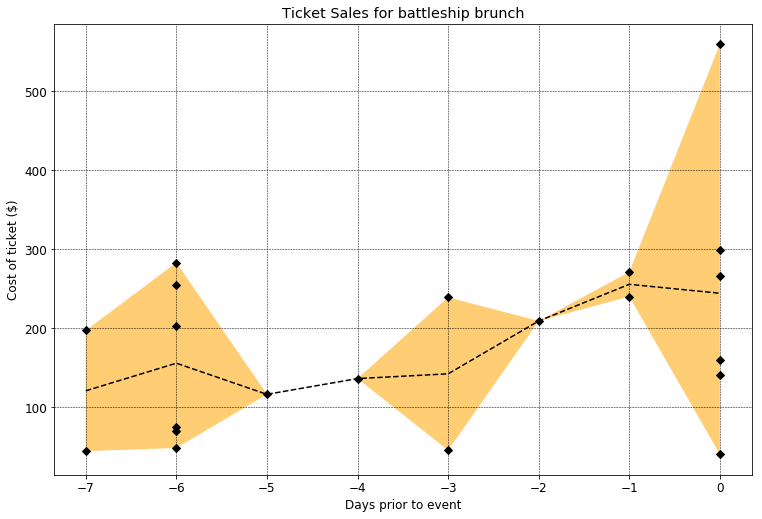

In [20]:
make_plot('battleship brunch')

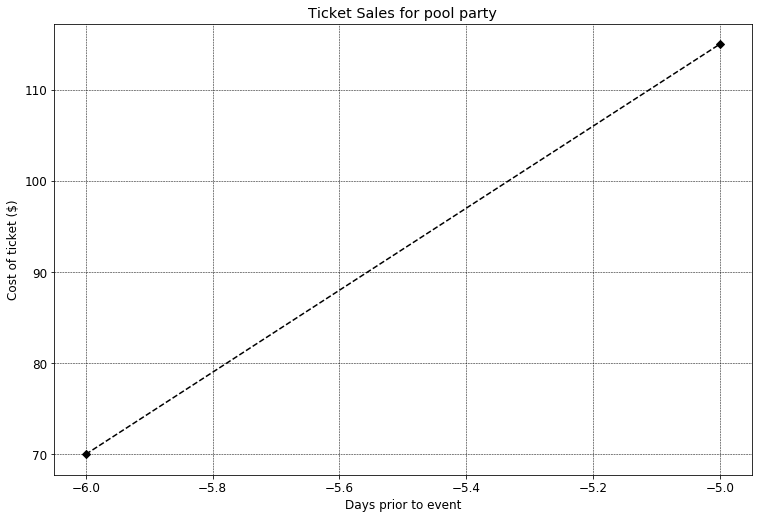

In [21]:
make_plot('pool party')

In [22]:
def make_plots():
    fig, ax = plt.subplots(1,1)
    colors = ['red', 'blue', 'yellow', 'green', 'cyan', 'black']
    ax.set_facecolor('#FFFFFF')
    c = 'orange '
    ax.grid(color='k', linestyle='--', linewidth=0.5)
    for idx,e in enumerate(events):
        mg_data = data_aggs[(data_aggs['event'] == e) & (data_aggs['days'] > -7)]
        ax.plot(mg_data['days'], mg_data['mean price'], "{}-".format(colors[idx][0]), label="{}".format(e))
        ax.fill_between(mg_data['days'], mg_data['mean price'], mg_data['min'], facecolor="{}".format(colors[idx]), alpha=0.2)
        ax.fill_between(mg_data['days'], mg_data['mean price'], mg_data['max'], facecolor="{}".format(colors[idx]), alpha=0.2)
        ax.set_xlabel('Days prior to event')
        ax.set_ylabel('Cost of ticket ($)')
    ax.legend()
    fig.savefig('all.png', dpi=300)

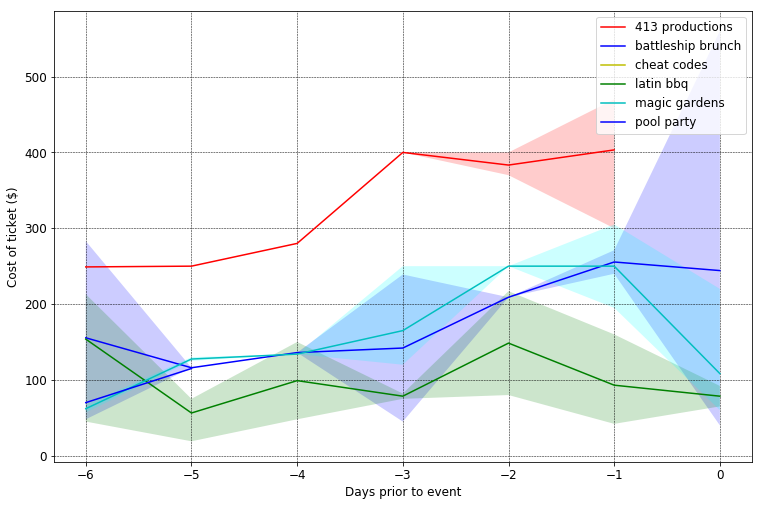

In [23]:
make_plots()